# Fatality Analysis Reporting System (FARS)

https://www.openml.org/d/40672  
Detailing the Factors Behind Traffic Fatalities on our Roads - FARS is a nationwide census providing NHTSA, Congress and the American public yearly data regarding fatal injuries suffered in motor vehicle traffic crashes.

In [11]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns

### Load the data from openml

In [2]:
from sklearn.datasets import fetch_openml
fars = fetch_openml(name='fars')

In [3]:
fars_pd = pd.DataFrame(fars.data, columns=fars.feature_names)
fars_pd['target'] = fars.target

#### Have a quick look

In [4]:
fars_pd.head(5)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
0,0.0,34.0,1.0,1.0,3.0,7.0,2.0,2.0,9.0,1.0,...,0.0,2.0,0.0,5.0,0.0,27.0,29.0,19.0,17.0,1
1,0.0,20.0,1.0,1.0,3.0,7.0,9.0,2.0,9.0,1.0,...,0.0,2.0,0.0,5.0,0.0,27.0,29.0,19.0,17.0,1
2,0.0,43.0,1.0,1.0,3.0,5.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,5.0,0.0,27.0,29.0,19.0,4.0,1
3,0.0,38.0,0.0,6.0,6.0,5.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,6.0,2.0,27.0,29.0,19.0,11.0,2
4,0.0,50.0,1.0,1.0,3.0,5.0,9.0,0.0,0.0,1.0,...,0.0,2.0,0.0,5.0,2.0,27.0,29.0,19.0,4.0,1


### Let's try PCA (Principal Component Analysis) first

normally that works quite good for low dimensional data

### We gonna try 2d and 3d visualization

In [5]:
#3d
pca3d = PCA(n_components=3)
result3d = pca3d.fit_transform(fars_pd.drop("target", axis=1),fars_pd["target"])
results3d_pd = pd.DataFrame(result3d,columns=['x','y','z'])
results3d_pd['target'] = fars_pd['target'].astype('int')

In [6]:
#2d
pca2d = PCA(n_components=2)
result2d = pca2d.fit_transform(fars_pd.drop("target", axis=1),fars_pd["target"])
results2d_pd = pd.DataFrame(result2d,columns=['x','y'])
results2d_pd['target'] = fars_pd['target'].astype('int')

### Let's plot

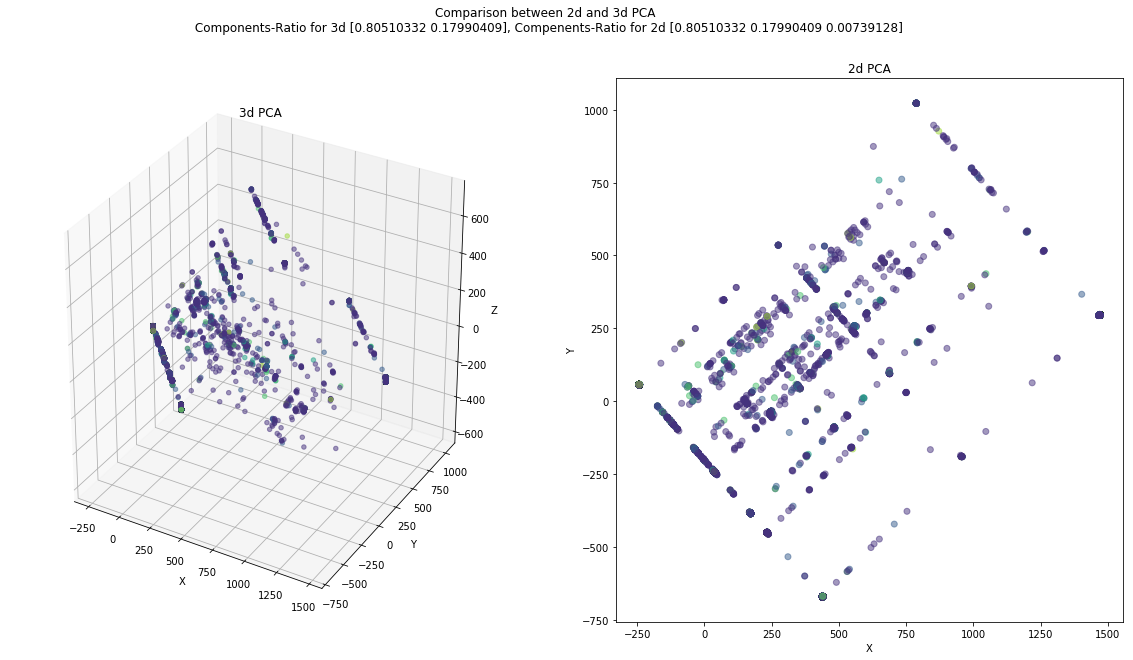

In [7]:
fig_pca = plt.figure(figsize=(20,10))
ax = fig_pca.add_subplot(121, projection='3d')
ax.scatter(results3d_pd['x'], results3d_pd['y'], results3d_pd['z'],c=results3d_pd['target'],  alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3d PCA")
ax.title
ax2 = fig_pca.add_subplot(122)
ax2.scatter(results2d_pd['x'], results2d_pd['y'],c=results3d_pd['target'], alpha=0.5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title("2d PCA")

fig_pca.suptitle("Comparison between 2d and 3d PCA \n Components-Ratio for 3d {}, Compenents-Ratio for 2d {}".format(pca2d.explained_variance_ratio_,pca3d.explained_variance_ratio_))
plt.show()

#### not too impressive ... tsne should do better

In [ ]:
sample_ds = fars_pd.sample(10000)
sample_ds = sample_ds.reset_index().drop("index",axis=1)
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000,learning_rate=100)
tsne_results = tsne.fit_transform(sample_ds)
tsne_results_pd = pd.DataFrame(tsne_results,columns=['x','y'])
tsne_results_pd['target'] = sample_ds['target'].astype('int')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.092s...
[t-SNE] Computed neighbors for 10000 samples in 1.132s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.139757
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.253654


In [ ]:
fig_tsne = plt.figure(figsize=(20,10))
ax3 = fig_tsne.add_subplot(121)
im = ax3.scatter(tsne_results_pd['x'], tsne_results_pd['y'],c=tsne_results_pd['target'],alpha=0.5, cmap=plt.cm.plasma)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title("2d tSNE")
fig_tsne.colorbar(im, ax=ax3)
plt.show()